In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [17]:
# Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [18]:
# Logistic Regression with Gradient Descent
def logistic_regression(X_train, y_train, X_test, y_test, alpha=0.1, epochs=500, lmbda=0.0):
    m, n = X_train.shape
    theta = np.zeros((n, 1))
    y_train = y_train.reshape(-1,1)
    y_test = y_test.reshape(-1,1)

    # To record metrics
    train_cost, test_cost = [], []
    train_acc, test_acc = [], []

    for i in range(epochs):
        # Training predictions
        z_train = np.dot(X_train, theta)
        pred_train = sigmoid(z_train)
        error_train = pred_train - y_train

        # Gradient with L2 penalty
        grad = (1/m) * np.dot(X_train.T, error_train) + lmbda * theta
        theta -= alpha * grad

        # Compute Training Loss
        loss_train = -(1/m) * np.sum(
            y_train*np.log(np.clip(pred_train,1e-15,1-1e-15)) +
            (1-y_train)*np.log(np.clip(1-pred_train,1e-15,1-1e-15))
        ) + (lmbda/2)*np.sum(theta**2)
        train_cost.append(loss_train)

        # Training Accuracy
        train_acc.append(metrics.accuracy_score(y_train, np.round(pred_train)))

        # Compute Test Loss and Accuracy
        z_test = np.dot(X_test, theta)
        pred_test = sigmoid(z_test)
        loss_test = -(1/len(y_test)) * np.sum(
            y_test*np.log(np.clip(pred_test,1e-15,1-1e-15)) +
            (1-y_test)*np.log(np.clip(1-pred_test,1e-15,1-1e-15))
        ) + (lmbda/2)*np.sum(theta**2)
        test_cost.append(loss_test)
        test_acc.append(metrics.accuracy_score(y_test, np.round(pred_test)))

    return theta, train_cost, test_cost, train_acc, test_acc

In [19]:
# Predict Function
def predict(X, theta):
    return np.round(sigmoid(np.dot(X, theta)))

In [20]:
# Load and Prepare Data
data = load_breast_cancer()
X = data.data
y = data.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add bias term
X_scaled = np.hstack([np.ones((X_scaled.shape[0],1)), X_scaled])

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=8)

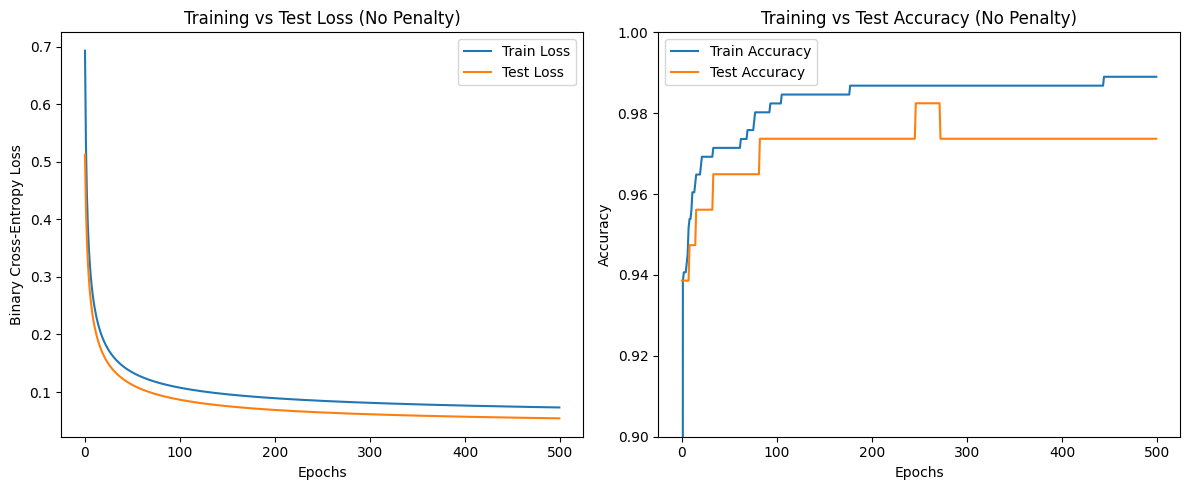

In [28]:
# Problem 2a: Logistic Regression without Penalty
theta, train_loss, test_loss, train_acc, test_acc = logistic_regression(
    X_train, y_train, X_test, y_test, alpha=0.1, epochs=500, lmbda=0.0
)

y_pred = predict(X_test, theta)

# Plot Loss & Accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(train_loss, label="Train Loss")
plt.plot(test_loss, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Binary Cross-Entropy Loss")
plt.title("Training vs Test Loss (No Penalty)")
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_acc, label="Train Accuracy")
plt.plot(test_acc, label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Test Accuracy (No Penalty)")
plt.ylim(0.9, 1.0)
plt.legend()
plt.tight_layout()
plt.show()

In [22]:
# Metrics
print("Problem 2a: Logistic Regression Metrics (No Penalty)")
print(f"Accuracy:  {metrics.accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {metrics.precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {metrics.recall_score(y_test, y_pred):.4f}")
print(f"F1 Score:  {metrics.f1_score(y_test, y_pred):.4f}")

Problem 2a: Logistic Regression Metrics (No Penalty)
Accuracy:  0.9737
Precision: 0.9710
Recall:    0.9853
F1 Score:  0.9781


Text(0.5, 1.0, 'Confusion Matrix (No Penalty)')

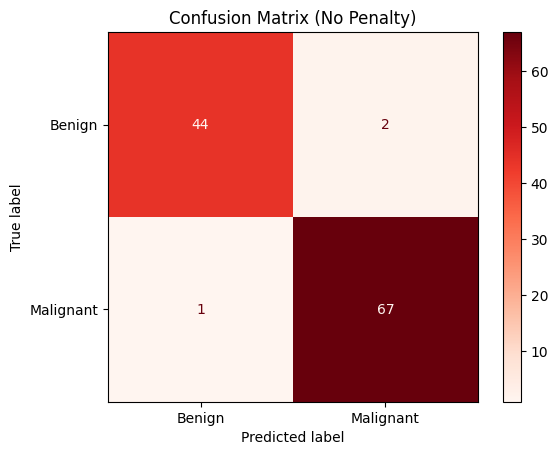

In [23]:
# Confusion Matrix
disp = metrics.ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, cmap='Reds', display_labels=['Benign', 'Malignant']
)
disp.ax_.set_title("Confusion Matrix (No Penalty)")

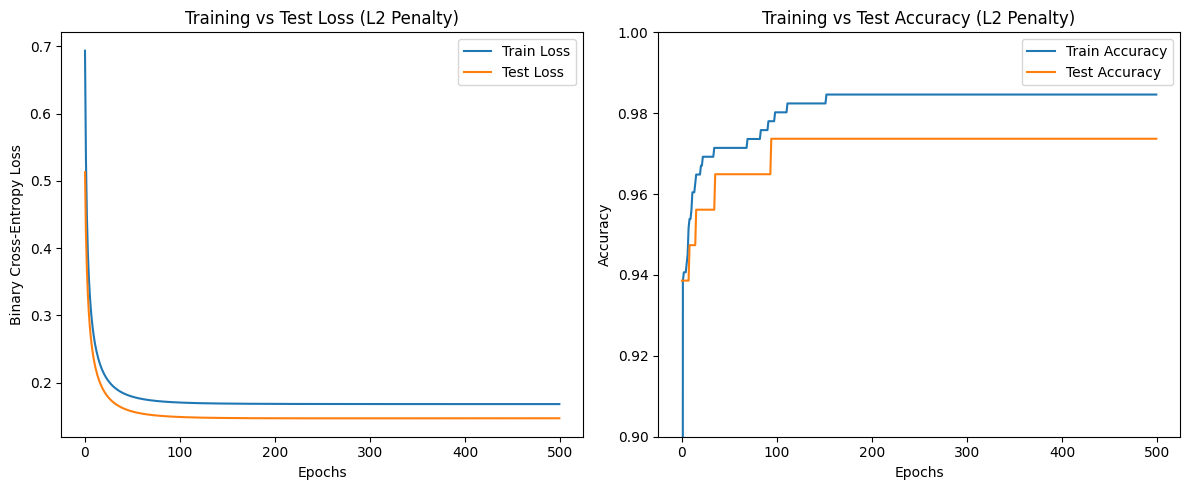

In [29]:
# Problem 2b: Logistic Regression with L2 Penalty
theta_pen, train_loss_pen, test_loss_pen, train_acc_pen, test_acc_pen = logistic_regression(
    X_train, y_train, X_test, y_test, alpha=0.1, epochs=500, lmbda=0.05
)

y_pred_pen = predict(X_test, theta_pen)

# Plot Loss & Accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(train_loss_pen, label="Train Loss")
plt.plot(test_loss_pen, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Binary Cross-Entropy Loss")
plt.title("Training vs Test Loss (L2 Penalty)")
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_acc_pen, label="Train Accuracy")
plt.plot(test_acc_pen, label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Test Accuracy (L2 Penalty)")
plt.ylim(0.9, 1.0)
plt.legend()
plt.tight_layout()
plt.show()

In [25]:
# Metrics
print("\nProblem 2b: Logistic Regression Metrics (L2 Penalty)")
print(f"Accuracy:  {metrics.accuracy_score(y_test, y_pred_pen):.4f}")
print(f"Precision: {metrics.precision_score(y_test, y_pred_pen):.4f}")
print(f"Recall:    {metrics.recall_score(y_test, y_pred_pen):.4f}")
print(f"F1 Score:  {metrics.f1_score(y_test, y_pred_pen):.4f}")


Problem 2b: Logistic Regression Metrics (L2 Penalty)
Accuracy:  0.9737
Precision: 0.9710
Recall:    0.9853
F1 Score:  0.9781


Text(0.5, 1.0, 'Confusion Matrix (L2 Penalty)')

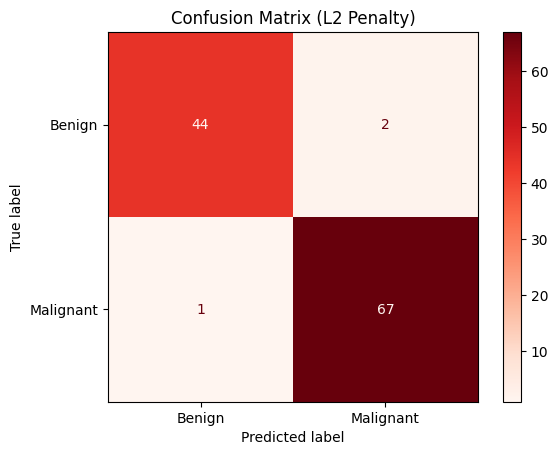

In [26]:
# Confusion Matrix
disp = metrics.ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_pen, cmap='Reds', display_labels=['Benign', 'Malignant']
)
disp.ax_.set_title("Confusion Matrix (L2 Penalty)")